# TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will be using the TMDB movie dataset for our data analysis. The TMDB dataset contains data about 10000+ movies and has attributes like budget, revenue, vote count, genres, production companies, etc. Some attributes have multiple values per row in the dataset.

<b><u>Exploratory Questions: </b></u>

Do films with high runtime receive better ratings?<br>
Which production house produces high rated movies?<br>
What are the characteristics of high revenue movies?<br>
What genres of movies receive the highest ratings?<br>
Are movie budget and movie ratings related to each other?<br>

<b><u>Data Import: </b></u>

In [217]:
# Import statements to import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To ensure graphs are reproduced inline in the notebook
% matplotlib inline

# Reading data into the dataframe
df = pd.read_csv('tmdb-movies.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

<a id='data wrangling'></a>
## Data Wrangling

### General Properties:

In [108]:
# Using shape property to pull the dimensions of the dataframes
df.shape

(10865, 16)

In [110]:
# Using the info function to pull essential information about the columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 1.7+ MB


We observe that cast, director, keywords, genres and production_companies have missing values in the data.

In [111]:
# Using the describe() function to pull standard metrics like standard deviation, mean, count, etc about the dataframe.
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

- Remove duplicates from the dataset

In [218]:
# We find the duplicates in the dataframe by using duplicated() function. 
# The duplicated() function marks all except the first instance of the duplicate row as True which we then count 
# using sum()
df.duplicated().sum()

1

In [219]:
# The drop_duplicates is used to drop all duplicate rows except for the first instance of the row.
df.drop_duplicates(inplace = True)

- Dropping columns not needed for analysis:
    1. id
    2. imdb_id
    3. homepage
    4. tagline
    5. overview
    6. keywords
    
I think these columns will not be needed in my analysis so I will drop them using the drop() function.

In [220]:
# We use the drop function to drop attributes from the dataframe. The parameter inplace = True does the deletion in its
# place
df.drop(columns= ['id','imdb_id','homepage','tagline','overview','keywords'], inplace=True)

- Checking datatypes and converting to the correct datatypes:
    1. Convert release date to datetime format 
       If we need to sort the data using release date we can for the rest of the analysis
    2. Convert budget and revenue to float format
       Budget and revenue are monetary data so we use to maintain precision and ensure they are consistent with

In [292]:
# The dtypes property will give us the datatypes of all the columns.
df.dtypes

budget                         float64
budget_adj                     float64
director                        object
genres                          object
original_title                  object
popularity                     float64
production_companies            object
release_date            datetime64[ns]
release_year                     int64
revenue                        float64
revenue_adj                    float64
runtime                          int64
vote_average                   float64
vote_count                       int64
cast                            object
dtype: object

In [221]:
# We use the to_datetime function to convert the release date to a datetime format.
df['release_date'] = pd.to_datetime(df['release_date'],format ='%m/%d/%y')

In [222]:
# We use the astype function to convert budget to float
df['budget'] = df['budget'].astype('float')

In [223]:
# We use the astype function to convert revenue to float
df['revenue'] = df['revenue'].astype('float')

-  Filling out missing values

   Cast, Director, Genres and Production Companies have missing values which are represented by NaN.
   We will replace those with the string literal 'Not Available' so we can categorize them independently and we do        not lose data since a large number of films (1030 precisely) do not have their production company data

In [224]:
# The isnull() function counts the instances of null values or NaN.
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [225]:
# fillna() function fills out the NaN values with 'Not Available' since some of the values might not be available.
df.fillna('Not Available', inplace = True)

-  Handling multiple values in a single column

   Attributes genres, production_companies and cast have multiple values in a single row which are seperated by the      pipe character.We will seperate them so data is normalised and can be easily analysed further.

In [226]:
# Create a list of the columns which have multiple values and need to be split.
split_columns = ['genres','production_companies','cast']

# For each of the values in the list, we use apply() function to apply a lambda function to split the multiple values 
# into a pandas series. 
# We further then use merge() to combime that Pandas series with the original dataframe and 
# then drop the actual columns with multiple values.
# We then use the melt() function on the dataframe to unpivot the columns with the multiple values into individual rows.
# Next we drop the variable column where the multiple values were segregated into inividual values
# Finally we use dropna() function to remove the null values.

for c in split_columns:
    df1 = df[c].apply(lambda x: x.split("|")).apply(pd.Series).merge(df,right_index = True, left_index=True).drop(c, axis=1).melt(id_vars = list(df.columns.difference([c])), value_name = c).drop('variable', axis=1).dropna()
    df = df1


In [315]:
df.shape

(302528, 15)

### Exploratory Data Analysis

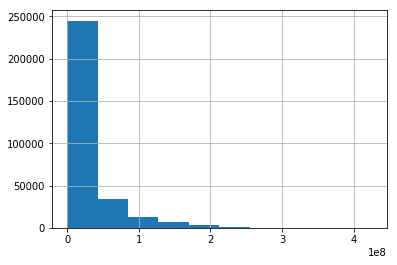

In [395]:
df['budget'].hist()

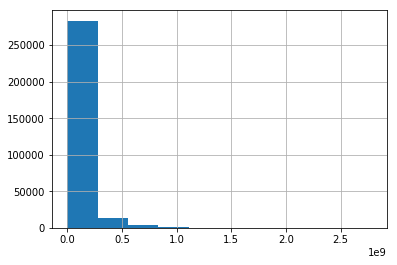

In [318]:
df['revenue'].hist()

Both movie budget and revenue appear to have a right skewed distribution.

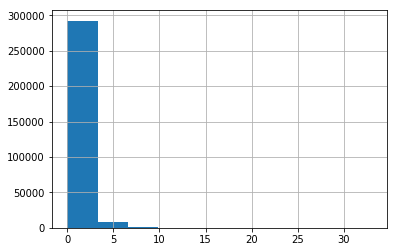

In [319]:
df['popularity'].hist()

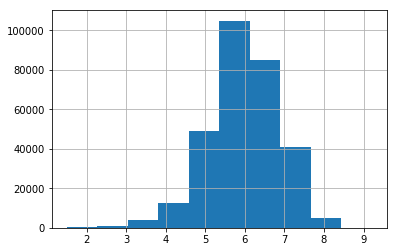

In [320]:
df['vote_average'].hist()

Popularity has a right skewed distribution while vote_average has a left skewed distribution

We analyze the genres variable and calculate the movie count across different genres.

In [350]:
# Grouping the data by genres and then taking a count of the original movie titles and sorting them.
genres = df.groupby(['genres']).original_title.nunique().sort_values(ascending=False)

In [369]:
# Defining function plot_bar_graph to plot a bar graph 

def plot_bar_graph(data, color, title, xlabel, ylabel):
    plt.subplots(figsize=(18,5)) #Define the plot size
    plt.bar(data.index, data, color=color) #Create the bar graph and define the color of bars
    plt.title(title) 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.xticks(rotation = 'vertical') # Define the x ticks and displays them vertically

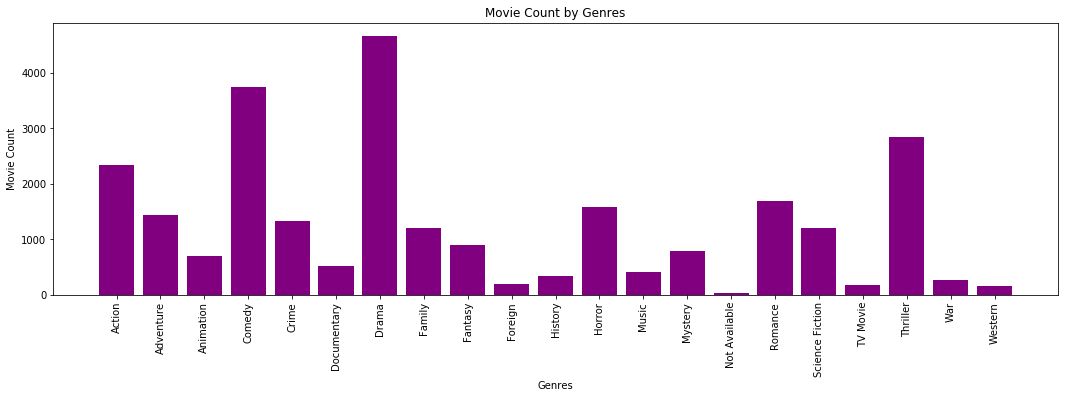

In [370]:
# Plotting the movie count by genres using the plot_bar_graph () function

plot_bar_graph(genres, 'purple', 'Movie Count by Genres','Genres','Movie Count')

We observe that Drama, Comedy and Thriller are the genres that have highest number of movies categorized in them. One movie can be categorized into multiple genres, so same movie may appear in different genres.

### Do films with high runtime receive better ratings?

In [294]:
# get the median amount of runtime
df['runtime'].median()

101.0

In [295]:
# compute samples which have low runtime
low_runtime = df.query('runtime < 101.0')
low_runtime

,budget,budget_adj,director,genres,original_title,popularity,production_companies,release_date,release_year,revenue,revenue_adj,runtime,vote_average,vote_count,cast
8,74000000.0,6.807997e+07,Kyle Balda|Pierre Coffin,Family,Minions,7.404165,Universal Pictures,2015-06-17,2015,1.156731e+09,1.064192e+09,91,6.5,2893,Sandra Bullock
9,175000000.0,1.609999e+08,Pete Docter,Comedy,Inside Out,6.326804,Walt Disney Pictures,2015-06-09,2015,8.537086e+08,7.854116e+08,94,8.0,3935,Amy Poehler
37,175000000.0,1.609999e+08,Peter Sohn,Adventure,The Good Dinosaur,3.339135,Walt Disney Pictures,2015-11-14,2015,3.319261e+08,3.053719e+08,93,6.6,1087,Raymond Ochoa
45,10000000.0,9.199996e+06,Ilya Naishuller,Action,Hardcore Henry,3.023253,Bazelevs Production,2015-09-12,2015,1.433379e+07,1.318708e+07,97,5.9,396,Sharlto Copley
46,135000000.0,1.241999e+08,Tim Johnson,Fantasy,Home,2.976436,Twentieth Century Fox Film Corporation,2015-03-18,2015,3.688710e+08,3.393612e+08,94,6.9,1060,Jim Parsons
48,30000000.0,2.759999e+07,Simon West,Thriller,Wild Card,2.932340,Current Entertainment,2015-01-14,2015,0.000000e+00,0.000000e+00,92,5.3,481,Jason Statham
55,20000000.0,1.839999e+07,John Wells,Drama,Burnt,2.584264,Double Feature Films,2015-10-02,2015,3.660674e+07,3.367819e+07,100,6.3,631,Bradley Cooper
61,120000001.0,1.104000e+08,Josh Trank,Action,Fantastic Four,2.487042,Twentieth Century Fox Film Corporation,2015-08-05,2015,1.679776e+08,1.545393e+08,100,4.4,1565,Miles Teller
62,3500000.0,3.219999e+06,Robert Eggers,Mystery,The Witch,2.464490,Parts and Labor,2015-03-24,2015,4.042394e+07,3.719001e+07,92,5.8,700,Anya Taylor-Joy
65,35000000.0,3.219999e+07,Aleksander Bach,Action,Hitman: Agent 47,2.354654,Twentieth Century Fox Film Corporation,2015-08-20,2015,8.234766e+07,7.575981e+07,96,5.5,820,Rupert Friend


In [296]:
# compute samples which have high runtime
high_runtime = df.query('runtime >= 101.0')
high_runtime

,budget,budget_adj,director,genres,original_title,popularity,production_companies,release_date,release_year,revenue,revenue_adj,runtime,vote_average,vote_count,cast
0,150000000.0,1.379999e+08,Colin Trevorrow,Action,Jurassic World,32.985763,Universal Studios,2015-06-09,2015,1.513529e+09,1.392446e+09,124,6.5,5562,Chris Pratt
1,150000000.0,1.379999e+08,George Miller,Action,Mad Max: Fury Road,28.419936,Village Roadshow Pictures,2015-05-13,2015,3.784364e+08,3.481613e+08,120,7.1,6185,Tom Hardy
2,110000000.0,1.012000e+08,Robert Schwentke,Adventure,Insurgent,13.112507,Summit Entertainment,2015-03-18,2015,2.952382e+08,2.716190e+08,119,6.3,2480,Shailene Woodley
3,200000000.0,1.839999e+08,J.J. Abrams,Action,Star Wars: The Force Awakens,11.173104,Lucasfilm,2015-12-15,2015,2.068178e+09,1.902723e+09,136,7.5,5292,Harrison Ford
4,190000000.0,1.747999e+08,James Wan,Action,Furious 7,9.335014,Universal Pictures,2015-04-01,2015,1.506249e+09,1.385749e+09,137,7.3,2947,Vin Diesel
5,135000000.0,1.241999e+08,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western,The Revenant,9.110700,Regency Enterprises,2015-12-25,2015,5.329505e+08,4.903142e+08,156,7.2,3929,Leonardo DiCaprio
6,155000000.0,1.425999e+08,Alan Taylor,Science Fiction,Terminator Genisys,8.654359,Paramount Pictures,2015-06-23,2015,4.406035e+08,4.053551e+08,125,5.8,2598,Arnold Schwarzenegger
7,108000000.0,9.935996e+07,Ridley Scott,Drama,The Martian,7.667400,Twentieth Century Fox Film Corporation,2015-09-30,2015,5.953803e+08,5.477497e+08,141,7.6,4572,Matt Damon
10,245000000.0,2.253999e+08,Sam Mendes,Action,Spectre,6.200282,Columbia Pictures,2015-10-26,2015,8.806746e+08,8.102203e+08,148,6.2,3254,Daniel Craig
11,176000003.0,1.619199e+08,Lana Wachowski|Lilly Wachowski,Science Fiction,Jupiter Ascending,6.189369,Village Roadshow Pictures,2015-02-04,2015,1.839877e+08,1.692686e+08,124,5.2,1937,Mila Kunis


In [297]:
# ensure that both sample groups included each sample exactly once
num_samples = df.shape[0]
num_samples == low_runtime['vote_average'].count() + high_runtime['vote_average'].count() # should be True

True

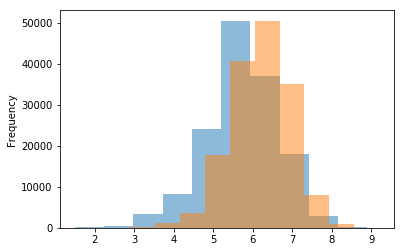

In [363]:
# get mean vote average for the low and high runtime groups
low_runtime['vote_average'].plot(kind='hist', alpha = 0.5)
high_runtime['vote_average'].plot(kind='hist', alpha = 0.5)

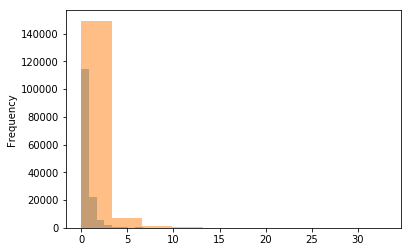

In [362]:
# get mean popularity for the low and high runtime groups
low_runtime['popularity'].plot(kind='hist', alpha = 0.5)
high_runtime['popularity'].plot(kind='hist', alpha = 0.5) 

### Which production companies produce movies with high ratings?

In [375]:
# We group by production companies and then calculate the mean of the vote average for each of those companies.
# Further we sort the list using the sort_values() function in descending order.

pc_vote_average = df.groupby(['production_companies']).vote_average.mean().sort_values(ascending=False)
pc_vote_average = pc_vote_average.head(10)
pc_vote_average

production_companies
EMI                                                    8.7
SMV Enterprises                                        8.7
Red Bull Media House                                   8.5
Edel records GmbH                                      8.5
Brain Farm Digital Cinema                              8.5
Arnold Stiefel Company                                 8.4
Talking Heads                                          8.4
MPN Cologne Film 3                                     8.4
Beanca Films                                           8.4
Fondo de InversiÃ³n y EstÃ­mulos al Cine (FIDECINE)    8.4
Name: vote_average, dtype: float64

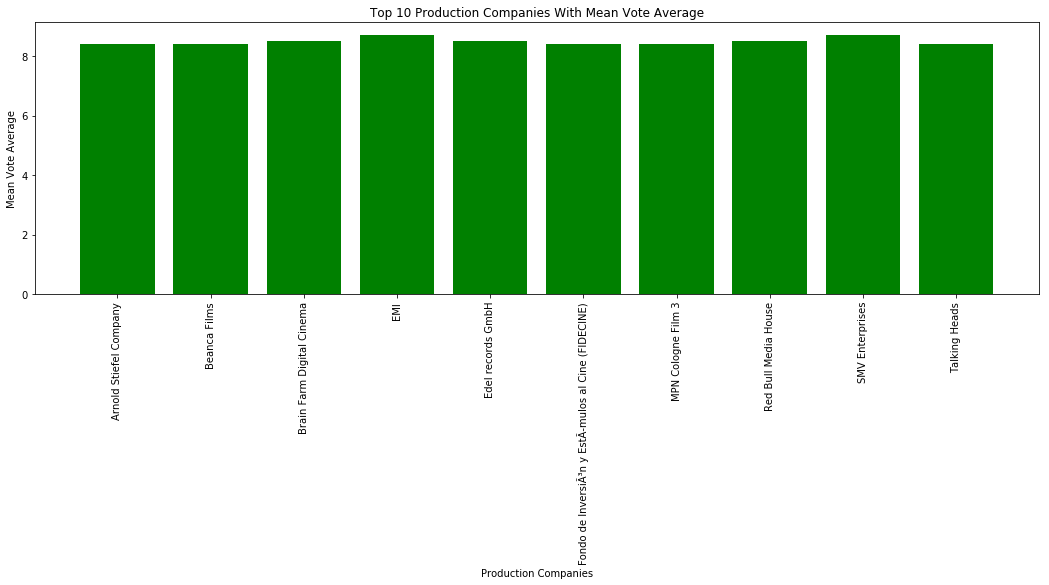

In [376]:
# Plotting a bar chart for production_companies and their mean vote average using plot_bar_graph() function
# Production company names contain non-ASCII characters for which we use UTF8 encoding to ensure data is read correctly.

import sys  
reload(sys)  
sys.setdefaultencoding('utf8') # handles non-ASCII characters
plot_bar_graph(pc_vote_average,'green','Top 10 Production Companies With Mean Vote Average','Production Companies','Mean Vote Average')
               
               

In [377]:
# We group by production companies and then calculate the mean of the popularity for each of those companies.

pc_popularity = df.groupby(['production_companies']).popularity.mean().sort_values(ascending=False)
pc_popularity = pc_popularity.head(10)
pc_popularity

production_companies
Fuji Television Network    14.940457
Bulletproof Cupid          14.311205
DefyNite Films             11.422751
Truenorth Productions      11.173104
3Foot7                     10.174599
Atman Entertainment         8.947905
Linson Films                8.947905
Bristol Automotive          8.110711
CatchPlay                   7.401401
Dayday Films                7.137273
Name: popularity, dtype: float64

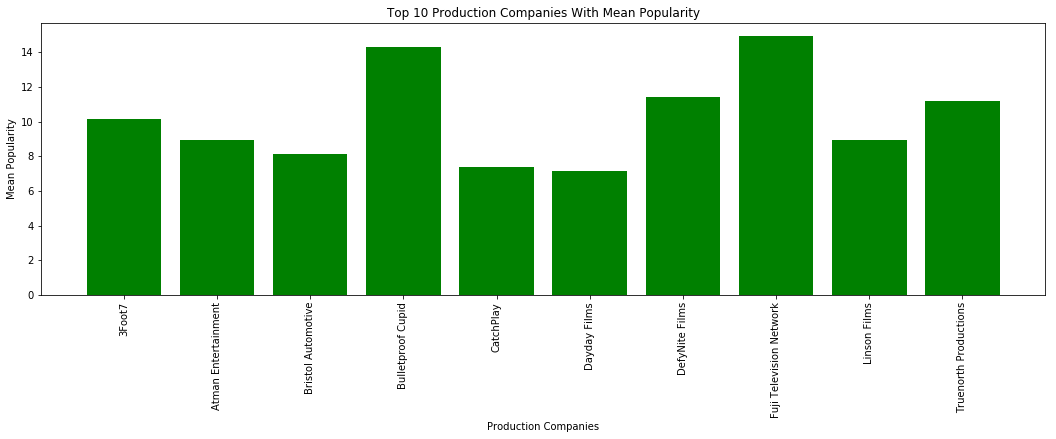

In [383]:
# Plotting a bar chart for production_companies and their mean popularity using plot_bar_graph() function
# Production company names contain non-ASCII characters for which we use UTF8 encoding to ensure data is read correctly.

import sys  
reload(sys)  
sys.setdefaultencoding('utf8') # handles non-ASCII characters
plot_bar_graph(pc_popularity,'green','Top 10 Production Companies With Mean Popularity','Production Companies','Mean Popularity')
               
               

We have opted to display only the top 10 production companies since we have a large number of production companies and many movies do not have their production company information unavailable.

If information becomes available, this analysis may possibly be subject to change.

### Which are characteristics of high revenue movies?

In [367]:
# Finding the median of revenue variable
df['revenue'].median()

1382462.0

In [304]:
# Splitting the movies into two sample population by revenue
high_revenue = df.query('revenue >= 1382462.0')
low_revenue = df.query('revenue < 1382462.0')

In [389]:
low_revenue.original_title.count()

151259

In [390]:
high_revenue.original_title.count()

151269

In [391]:
high_revenue.describe()

,budget,budget_adj,popularity,release_year,revenue,revenue_adj,runtime,vote_average,vote_count
count,1.512690e+05,1.512690e+05,151269.000000,151269.000000,1.512690e+05,1.512690e+05,151269.000000,151269.000000,151269.000000
mean,4.331946e+07,4.954209e+07,1.342832,2002.117493,1.255423e+08,1.509191e+08,110.343626,6.167762,625.444235
std,4.704292e+07,4.946207e+07,1.722340,10.635398,1.939738e+08,2.221702e+08,20.225096,0.767070,961.010627
min,0.000000e+00,0.000000e+00,0.001117,1960.000000,1.382462e+06,1.298972e+06,26.000000,2.100000,10.000000
25%,1.000000e+07,1.290724e+07,0.521071,1997.000000,1.831715e+07,2.441013e+07,97.000000,5.700000,91.000000
50%,2.900000e+07,3.463336e+07,0.903283,2005.000000,5.713872e+07,7.283537e+07,107.000000,6.200000,263.000000
75%,6.000000e+07,7.270485e+07,1.554441,2010.000000,1.520000e+08,1.850422e+08,120.000000,6.700000,719.000000
max,4.250000e+08,4.250000e+08,32.985763,2015.000000,2.781506e+09,2.827124e+09,705.000000,8.400000,9767.000000


In [394]:
df['popularity'].median()

0.49916499999999997

### Which genres of movies receive high ratings?

In [306]:
# We group each genre and then calculate the mean of the vote average for each of those genres.
# Further we sort the list using the sort_values() function in descending order.
top_rating_genres = df.groupby(['genres']).vote_average.mean().sort_values(ascending=False)
top_rating_genres

genres
Documentary        6.952572
History            6.441648
Not Available      6.420833
Music              6.401079
War                6.350155
Animation          6.321520
Drama              6.199797
Crime              6.132071
Western            6.114437
Romance            6.062615
Mystery            5.982687
Adventure          5.961214
Family             5.955692
Foreign            5.902407
Comedy             5.896691
Fantasy            5.888472
Action             5.835376
Thriller           5.814370
Science Fiction    5.712452
TV Movie           5.704590
Horror             5.399961
Name: vote_average, dtype: float64

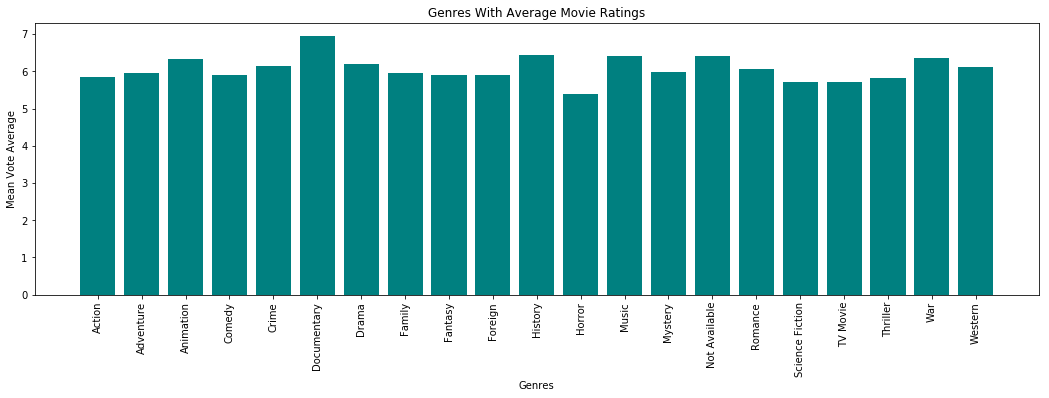

In [381]:
# Plotting a bar chart for genres and their mean vote average using plot_bar_graph() function

plot_bar_graph(top_rating_genres,'teal','Genres With Average Movie Ratings','Genres','Mean Vote Average')

In [307]:
# We group each genre and then calculate the mean of the popularity for each of those genres.
# Further we sort the list using the sort_values() function in descending order.
top_popular_genres = df.groupby(['genres']).popularity.mean().sort_values(ascending=False)
top_popular_genres

genres
Adventure          1.393641
Science Fiction    1.286775
Fantasy            1.267306
Action             1.131780
Animation          0.997483
Family             0.947644
Thriller           0.895181
War                0.880839
Crime              0.867995
Mystery            0.837611
Western            0.765821
Drama              0.714055
Comedy             0.697703
History            0.680635
Romance            0.675075
Music              0.585522
Horror             0.547123
TV Movie           0.278304
Documentary        0.222190
Foreign            0.203553
Not Available      0.172189
Name: popularity, dtype: float64

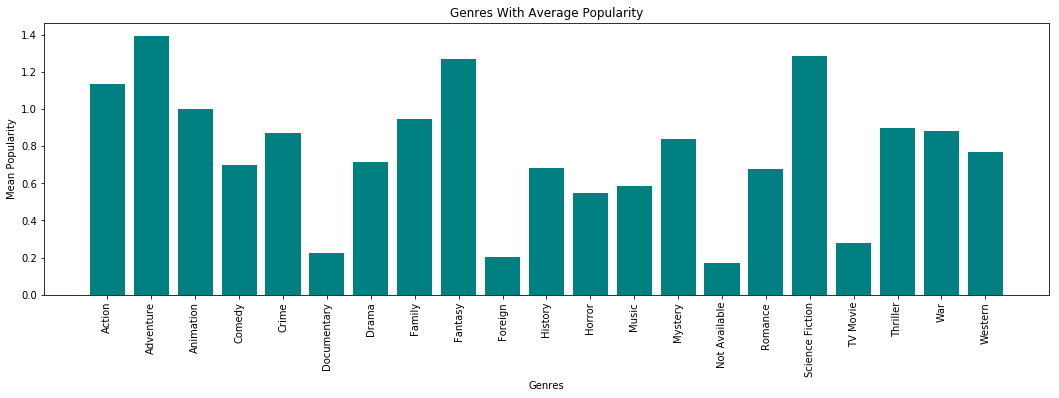

In [382]:
# Plotting a bar chart for genres and their mean popularity using plot_bar_graph() function

plot_bar_graph(top_popular_genres,'teal','Genres With Average Popularity','Genres','Mean Popularity')

### Are movie budget and movie ratings related to each other?

We plot budget against vote_average and popularity respectively to see if there is correlation in them.

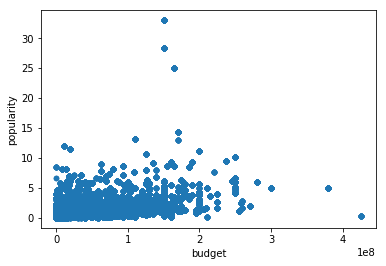

In [309]:
# Creating a scatterplot of budget against popularity
df.plot.scatter('budget','popularity')

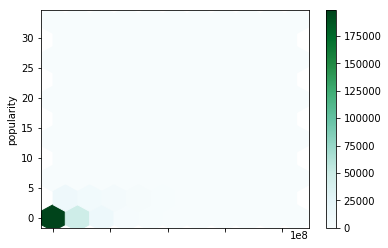

In [312]:
# Creating a hexbin plot of budget against popularity
df.plot.hexbin('budget','popularity', gridsize = 10)

From the above plots, it can be inferred that there is very slight positive correlation between budget and popularity

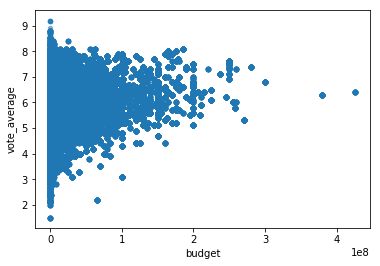

In [310]:
# Creating a scatterplot of budget against vote_average
df.plot.scatter('budget','vote_average', alpha=0.5)

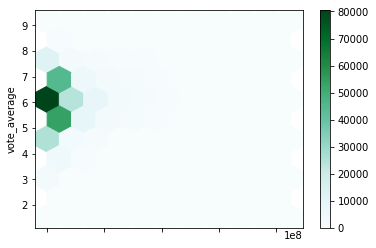

In [311]:
# Creating a hexbin plot of budget against vote_average
df.plot.hexbin('budget','vote_average', gridsize=10)

In [308]:
# Calculating the correlation coefficient matrix

df.corr(method='pearson')

,budget,budget_adj,popularity,release_year,revenue,revenue_adj,runtime,vote_average,vote_count
budget,1.000000,0.973977,0.522041,0.169836,0.733422,0.650899,0.251881,0.118510,0.647468
budget_adj,0.973977,1.000000,0.485455,0.067131,0.708012,0.667814,0.280513,0.128999,0.602327
popularity,0.522041,0.485455,1.000000,0.145121,0.659106,0.606387,0.170191,0.266122,0.778503
release_year,0.169836,0.067131,0.145121,1.000000,0.101711,-0.019867,-0.109235,-0.120109,0.161423
revenue,0.733422,0.708012,0.659106,0.101711,1.000000,0.940243,0.211366,0.226583,0.800724
revenue_adj,0.650899,0.667814,0.606387,-0.019867,0.940243,1.000000,0.224477,0.246470,0.734502
runtime,0.251881,0.280513,0.170191,-0.109235,0.211366,0.224477,1.000000,0.246314,0.218872
vote_average,0.118510,0.128999,0.266122,-0.120109,0.226583,0.246470,0.246314,1.000000,0.328366
vote_count,0.647468,0.602327,0.778503,0.161423,0.800724,0.734502,0.218872,0.328366,1.000000


### Conclusions

<p>
The genres which receive top vote_averages(ratings) are:<br>
    1. Documentary<br>
    2. History<br>
    3. Not Availaible<br>
    4. Music<br>
    5. War <br>
 <br>
 Since the Not Available genre ia a category for which we had null data, it could be possible that the movies           belonged to other categories and this would change the top genres with top vote averages.</p>
<p> 
The genres which are most popular are:<br>
    1. Adventure    
    2. Science Fiction    
    3. Fantasy           
    4. Action             
    5. Animation</p>    
<p>
We compared two sample groups, movies with high runtime and low runtime and we can conclude that movies with high runtime receive slightly better movie ratings than movies with low runtime. This applies across vote_average as well as popularity.</p>
<p>
Budget and Vote_average have a very slight positive correlation between them while Budget and Popularity have a slightly higher positive correlation between them. However we cannot use this to imply any sort of relationship between them since it is not a strong correlation.</p>
<p>
The movie count for high revenues movies is greater than those with low revenues movies. Most high revenue movies greater than the 50th percentile are released after the year 2015 and have an average runtime of 105 minutes or more which is greater than the median runtime of 101 minutes for the data set.</p>
    
   


